In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 100, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
als_results = tt.fit_ensemble(data, range(1,9), replicates=10, method='direct', options={'tol': 1e-6})
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.7704, max error = 0.9036, mean error = 0.7837, time to fit = 0.6122s
Optimizing rank-2 models.
   10/10 converged, min error = 0.4316, max error = 0.6412, mean error = 0.5363, time to fit = 0.8541s
Optimizing rank-3 models.
   10/10 converged, min error = 0.0607, max error = 0.6411, mean error = 0.1558, time to fit = 1.3363s
Optimizing rank-4 models.
   10/10 converged, min error = 0.0607, max error = 0.0607, mean error = 0.0607, time to fit = 0.9566s
Optimizing rank-5 models.
   10/10 converged, min error = 0.0607, max error = 0.0607, mean error = 0.0607, time to fit = 2.2826s
Optimizing rank-6 models.
   10/10 converged, min error = 0.0607, max error = 0.0607, mean error = 0.0607, time to fit = 1.8063s
Optimizing rank-7 models.
   10/10 converged, min error = 0.0607, max error = 0.0607, mean error = 0.0607, time to fit = 1.1325s
Optimizing rank-8 models.
   10/10 converged, min error = 0.0607, max error = 0.0607, mean error 

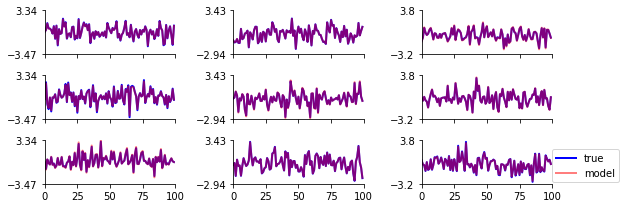

In [4]:
fig, axes, plot_obj = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);
axes[-1,-1].legend(('true', 'model'), bbox_to_anchor=[0,0,1.55,0.9])

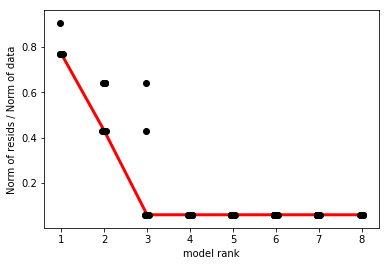

In [5]:
tt.plot_error(als_results, scatter_kw=dict(c='k'), line_kw=dict(c='r', lw=3, zorder=0));

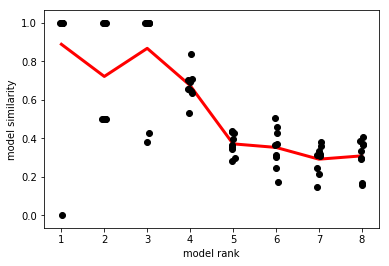

In [6]:
tt.plot_similarity(als_results, scatter_kw=dict(c='k'), line_kw=dict(c='r', lw=3, zorder=0));